# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd


df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')


## 1) Is the distribution of body temperatures normal?

### First, let's examine the data

In [3]:
print(df.info())
print(df.describe())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


### Plot a Histogram
#### There are only 130 observations, and the range of body temperatures go from 96.3 degrees to 100.8 with an average value of 98.25 degrees. In order to see how these values are distributed, let's plot a histogram of the temperature values.

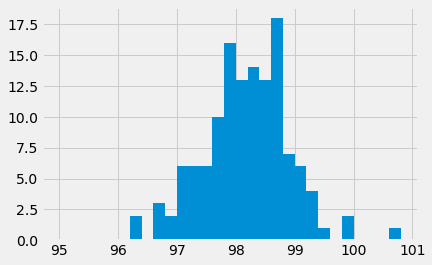

In [4]:
temp = df.temperature

#bin the historgram by 1/5th of a degree, to avoiding over- and under-binning
plt.hist(temp,bins=np.arange(int(temp.min()-1),int(temp.max()+1),.2))
plt.show()

### Plot the actual CDF and Theoretical CDF
#### The histogram isn't extremely helpful in identifying the normaly of the curve. Most of the values are concentrated in the center and spred out towards the edges, however we will need more decisive evidence. Let's bring in the ecdf() function from the datacamp exercises to compare the CDF's of an ideal normal curve and the temperature data.

In [5]:
# datacamp ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [6]:
# calculate the mean and standard deviation of the data and draw a normally distributed sample of the data. 
mean_temp = np.mean(temp)
std_temp = np.std(temp)
theor_temp = np.random.normal(mean_temp, std_temp, size=10000)
x,y = (ecdf(temp))
x_th, y_th =ecdf(theor_temp)

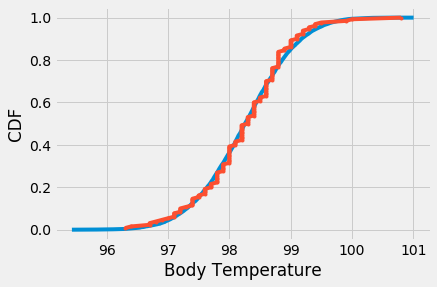

In [7]:
#plot the real and theoretical CDF's
plt.plot(x_th,y_th)
plt.plot(x,y, marker='.')
plt.xlabel('Body Temperature')
plt.ylabel('CDF')

plt.show()

#### As you can see, the actual CDF aligns quite well with the theoretical sample. This is pretty solid evidence that the data is normally distributed.

### Check 68-95-99.7 rule
#### Perform a quick calculation to see the percentage of values that fall withing 1,2, and 3 standards of deviation. 

In [8]:
std1_sum = len([t for t in temp if ((t < mean_temp + std_temp) & (t > mean_temp - std_temp))])
std2_sum = len([t for t in temp if ((t < mean_temp + 2*std_temp) & (t > mean_temp - 2*std_temp))])
std3_sum = len([t for t in temp if ((t < mean_temp + 3*std_temp) & (t > mean_temp - 3*std_temp))])
(print('Number of values more than 3 std away from mean:',(len(temp) -std3_sum)))
pct_std1 = std1_sum / len(temp)
pct_std2 = std2_sum / len(temp)
pct_std3 = std3_sum / len(temp)
(pct_std1, pct_std2, pct_std3)

Number of values more than 3 std away from mean: 1


(0.6923076923076923, 0.9461538461538461, 0.9923076923076923)

### Body Temperature is Normally Distributed
#### These results aren't exactly 68-95-99.7, however, they are  fairly close. Having more data would definitely help, but it is reasonable to say that the data we do have is normally distributed.


## 2) Is the sample size large? Are the observations independent?

The sample size is definitely not large. 130 observations is not enough to conclude anything with certainty about populations containing millions of people let alone the world population.

However, the obervations do seem to be independen. Each value is obtained from a different person that will have a different body temperature. One persons body temperature does not affect the next persons. Outside factors such as illness might, but that doesn't factor in to the independence from other people's measurements.

## 3) Is the true population mean really 98.6 degrees F?

### Bootstrap Hypothesis Test

In [9]:
# create bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    '''Generat bootstrap replicate of 1 dimensional data'''
    return func(np.random.choice(data, size=len(data)))

# datacamp draw bootstrap reps function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

# difference of means function
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

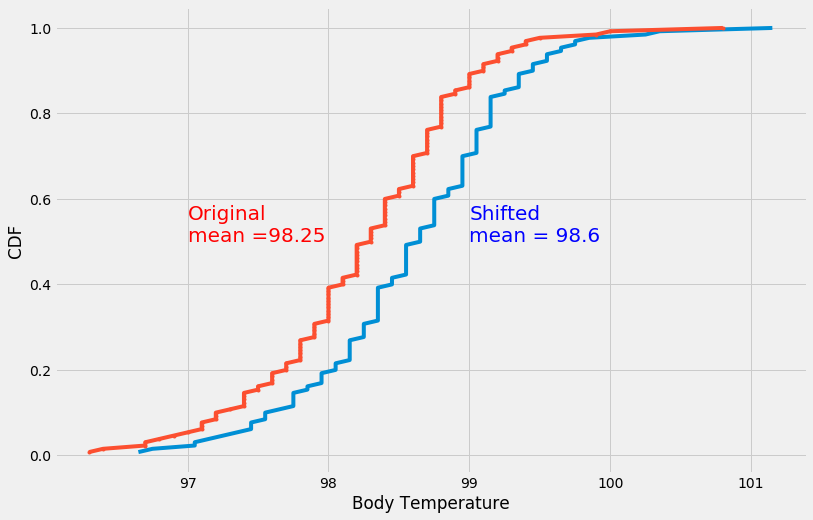

In [10]:
test_mean = 98.6
temp_shift = temp - mean_temp + test_mean
#plot the real and theoretical CDF's
x,y = ecdf(temp)
x_sh,y_sh = ecdf(temp_shift)

plt.figure(figsize = (12,8))
plt.plot(x_sh,y_sh)
plt.plot(x,y, marker='.', linestyle = None)
plt.xlabel('Body Temperature')
plt.ylabel('CDF')
plt.text(x= 99, y = .5, s='Shifted\nmean = 98.6', color = 'blue', fontsize = 20)
plt.text(x= 97, y = .5, s='Original\nmean ='+str(round(mean_temp,2)), color = 'red', fontsize = 20)


plt.show()


In [11]:
def diff_from_test(data):
    return np.mean(data) - 98.6
diff_obs = diff_from_test(temp)
diff_obs


-0.35076923076921673

In [12]:
bs_temps = draw_bs_reps(temp_shift, diff_from_test, 10000)

p = np.sum(bs_temps <= diff_obs) / 10000
print('p value = ',p)

p value =  0.0


### Frequentist
#### Would you use a one-sample or two-sample test? Why? 
   - For our situation we should use a one-sample test because we are comparing a single set of data to a sample mean value. If we had to separate samples of data, we would use a two-sample approach.
   
#### In this situation, is it appropriate to use the  t-  or  z-  statistic?
   - We should use a z-statistic because our sample size is greater than 30, so the standard deviation or our sample and the sample std are pretty close. Some people use the t-test for whenever the population std is unknown, but for our purposes lets start off with the z-stat

In [13]:
#create z-test function
def ztest(data,popmean):
    """Calculate z statistic using the std of the sample"""
    stat = (np.mean(data) - popmean) / (np.std(data)/len(data)**.5)
    p = 2*(1-st.t.cdf(abs(stat),len(data)))
    return stat, p

from scipy import stats as st
z = ztest(temp,98.6)
print('z-statistic =',z[0], '    p-value:',z[1])


z-statistic = -5.475925202078116     p-value: 2.16514104867e-07


#### Now try using the other test. How is the result be different? Why?


In [14]:
# manual 
#first obtain the sample std by setting ddof in np.std to 1
s = np.std(temp, ddof = 1)
t = (mean_temp - 98.6) / (s/len(temp)**.5)
print('Manually calculated t statistic:',t)

# using scipy
t = st.ttest_1samp(temp,98.6)
print('scipy t statistic:',t)


Manually calculated t statistic: -5.454823292364079
scipy t statistic: Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Our t-stat is fairly close to the z-statistic we calculated in the previous step. However, it is slightly smaller. This is dur to the difference in the standard deviation of our data and the sample standard deviation of the data. The actual standard deviation of a sample of data from the population tends to overestimate teh actual standard of deviation. The z-stat uses the standard deviation of the sample while the t test uses the sample std. Hence the slightly smaller value.

## 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [15]:
np.random.seed(1)
sample_10 = np.random.choice(temp, size = 10, replace = False)

z_s10 = ztest(sample_10,98.6)
print('z-statistic of the sample:',z_s10[0], '   p-value:',z_s10[1])

t_s10 = st.ttest_1samp(sample_10,98.6)
print('t-statistic of the sample:',t_s10[0],"   p-value:",t_s10[1])

z-statistic of the sample: -2.07215477416    p-value: 0.0650483041337
t-statistic of the sample: -1.96581862523    p-value: 0.0808842363197


#### Which one is the correct one to use?
- Since our sample size is now less than 30, we should be using the t-test. The reasoning is the same as the as above, the difference in the sample std of the sample and the actual std of the sample is larger the smaller the sample.

#### What do you notice? What does this tell you about the difference in application of the  t-  and  z-  statistic?
- The difference in value when the sample was 130 was almost negligble between the 2 tests. However, there is a much more significant difference between the 2 test. The Z-test should really only be used when the standard deviation of the population is known. However, it is a good estimate when a sample size larger than 30 is taken. When the sample is small, the T-test should be used.

## 5) At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

* First, we need to define what we mean by abnormal. For this question, I will use the values at which 95% percent of the data falls in between

In [29]:
#obtain the 95% confidence interval for the data
conf_int = np.percentile(temp,[2.5,97.5])
z = st.norm.ppf(.975)
margin_error = z*np.std(temp) / len(temp)**.5
print('Confidence Interval:',conf_int)
print('zscore at 95% confidence',z)
print('Margin of Error for the sample:',margin_error)

Confidence Interval: [ 96.7225  99.4775]
zscore at 95% confidence 1.95996398454
Margin of Error for the sample: 0.125548657774


The average body temperatures of the population is estimated to be within .126 degrees of the average with 95% confidence.

Abnormal temperatures would be anything that falls below 96.723 and above 99.478 degrees based on the data available. 
    

### Bootstrap Approach

In [30]:
# create bootstrap replicate function
def bs_rep(data):
    '''Generate bootstrap replicate of 1 dimensional data'''
    return np.random.choice(data, size=len(data))

# datacamp draw bootstrap reps function
def bs_reps(data, size=1):
    """Draw bootstrap replicates."""
    #set different seed for each replicate to be able to replicate bootsrap data
    
    bs_replicates = [bs_rep(data) for x in range(size)]
    return bs_replicates

def bs_avg_func(bs_reps,func):
    """Take the average of the value of a 1 to 1 function ove the bootstrap replicates"""
    return np.mean([func(rep) for rep in bs_reps])

def bs_conf_int(bs_reps, conf_int):
    """Average confidence interval of a certain number of replicates."""
    
    # Initialize array of the low and high end of the confidence interval
    low = [np.percentile(rep,conf_int[0]) for rep in bs_reps]
    high = [np.percentile(rep,conf_int[1]) for rep in bs_reps]

    #return the average confidence interval of all the replicates
    return np.mean(low), np.mean(high)


In [31]:
np.random.seed(1)
# draw 10000 bootstrap replicates
bs_temp = bs_reps(temp,10000)

# calculate the average value of the mean for the bootstrapped data
bs_temp_mean = bs_avg_func(bs_temp, np.mean)

# calculate the average standard deviation of the bs data
bs_temp_std = bs_avg_func(bs_temp, np.std)

# calculate the average 95% confidence interval of the bs data
bs_temp_conf_int = np.percentile(draw_bs_reps(temp, np.mean, 10000), [2.5,97.5])

# get range for 'normal' values
normal = bs_conf_int(bs_temp, [2.5,97.5])

print('Bootstrap mean:',bs_temp_mean)
print('Bootstrap std:',bs_temp_std)
print('Bootstrap 5% confidence interval:',bs_temp_conf_int)
print('Range for normal body temperatures:',normal)

Bootstrap mean: 98.2489635385
Bootstrap std: 0.72608527134
Bootstrap 5% confidence interval: [ 98.12382692  98.37384615]
Range for normal body temperatures: (96.765419500000007, 99.578380750000008)


In [32]:
#obtain the 95% confidence interval for the data
bs_margin_error = 1.96*(bs_temp_std) / len(temp)**.5
print('Margin of Error for the bootstrap sample:',bs_margin_error)

Margin of Error for the bootstrap sample: 0.124816506346


After the bootstrap test, the average body temperatures of the population is estimated to be 
within .124 degrees of the average with 95% confidence.

Abnormal temperatures would be anything that falls below 96.765 and above 99.578 degrees based on the bootstrap data. 

## 6) Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

### Two-Sample Bootstrap Hypothesis Test
#### Null Hypothesis: The average body temperatures for men and women are equal

In [20]:
#create male and female datasets
male = df.temperature.loc[df.gender == 'M']
female = df.temperature.loc[df.gender == 'F']

print(male.describe())
print(female.describe())



count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


In [21]:
#take the mean of all temperatures
mean_temp = temp.mean()

#find the difference of mean betwen the male and female observations
diff_mean = diff_of_means(male,female)

print('Difference of means between male and female:',diff_mean)

Difference of means between male and female: -0.289230769230727


In [22]:
# shift the mmale and female data to the mean of the total
male_shifted = male - male.mean() + mean_temp
female_shifted = female - female.mean() + mean_temp

# Compute 10,000 bootstrap replicates from shifted arrays
bs_male = draw_bs_reps(male_shifted, np.mean, size=10000)
bs_female = draw_bs_reps(female_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_diff_mean = bs_male - bs_female

# The p-value is fraction of the replicates that gave a more extreme difference than the original difference
p = np.sum(bs_diff_mean <= diff_mean) / len(bs_diff_mean)
print('p-value =', p)

p-value = 0.0117


### Conclusion

After performing a 2-sample bootstrap hypothesis test on the null hypothesis that male and female body tempertures are equal, the p-value we were left with was .011. This is a statistically significant result that goes against the null hypothesis. This means that the based on the sample data, the difference in mean of male and female body temperature is significant. 